In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

## Frequency Filter

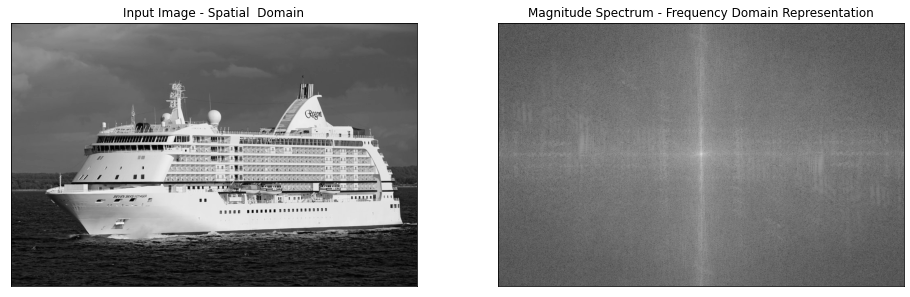

In [2]:
img = cv2.imread('ship.jpeg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(16,10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image - Spatial  Domain'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum - Frequency Domain Representation'), plt.xticks([]), plt.yticks([]);

### 1. Low Pass Filter

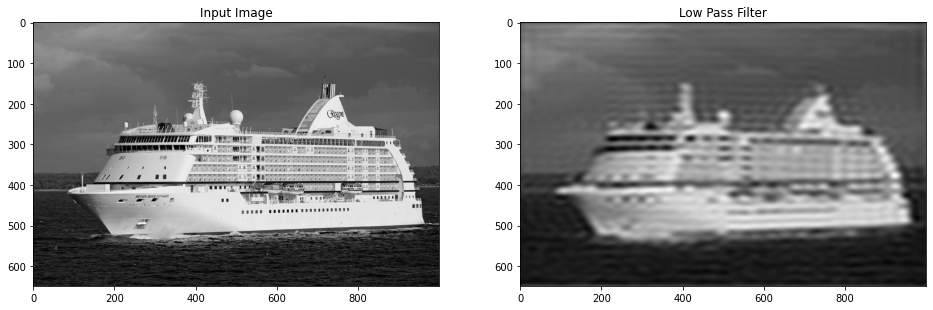

In [3]:
rows, cols = img.shape

crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_low_inverse = cv2.idft(f_ishift)
img_low_inverse = cv2.magnitude(img_low_inverse[:,:,0],img_low_inverse[:,:,1])

plt.figure(figsize=(16,10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(img_low_inverse, cmap = 'gray')
plt.title('Low Pass Filter');

### 2. High Pass Filter

In [4]:
img = cv2.imread('ship.jpeg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

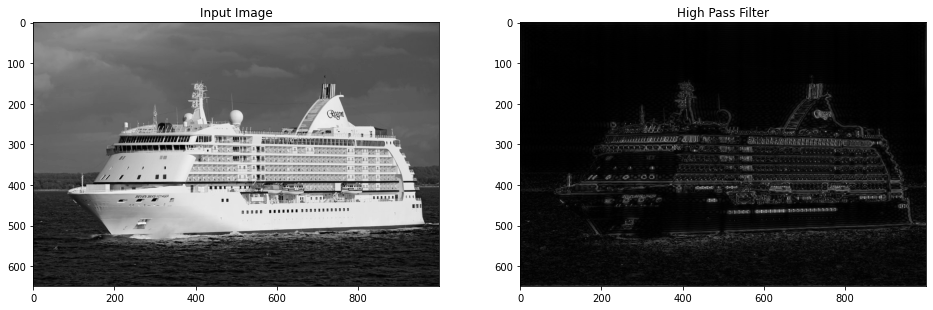

In [5]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

fshift[crow-60:crow+60, ccol-60:ccol+60] = 0
f_ishift = np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap = 'gray')
plt.title('High Pass Filter');

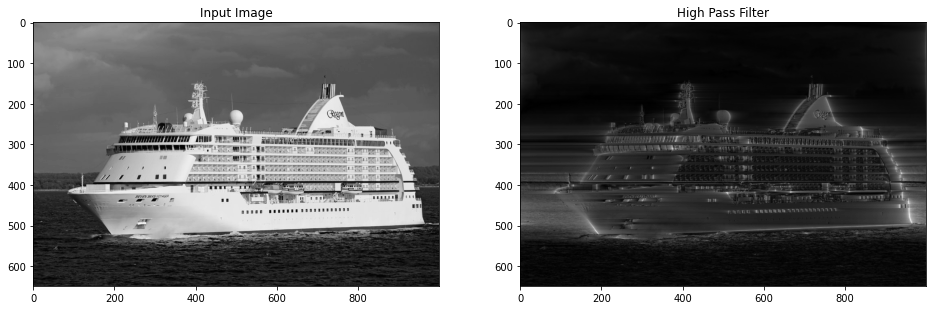

In [6]:
img = cv2.imread('ship.jpeg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

fshift[crow-1000:crow+1000, ccol-1000:ccol+1000] = 0
f_ishift = np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap = 'gray')
plt.title('High Pass Filter');